# CIS5026 WRIT1 - How do words in listing names affect listing prices?

#### The aim of this project is to research if there is a difference in the most commonly used words in listing names at the high and low end of the price spectrum. For properties that are well reviewed, we could advise users of popular listing words in the luxury and budget ranges We don't have listing reviews so this would be future work. This is just an exploratory analysis of commonly used listing words. but could try and link it to availability.  

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [9]:
# Read in the data and check structure, column headers and data types
df = pd.read_csv('AB_NYC_2019.csv')
print(df.head())
df.dtypes
df.shape

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

(48895, 16)

In [10]:
# Check if null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [11]:
# Some nulls, so count nulls per column
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We aren't going to use either review columns in this analysis and there's no way to impute for a listing name, so we'll drop the columns with no name entry. 

In [34]:
df.dropna(subset=['name'], inplace=True)
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10042
reviews_per_month                 10042
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [35]:
# Get the basic descriptive stats
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.887900e+04,4.887900e+04,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,38837.000000,48879.000000,48879.000000
mean,1.902062e+07,6.763013e+07,40.728945,-73.952168,152.722355,7.011027,23.281205,1.373410,7.145891,112.788989
std,1.098282e+07,7.862070e+07,0.054529,0.046160,240.186804,20.016000,44.556149,1.680502,32.957738,131.613322
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.474248e+06,7.816856e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.968643e+07,3.079133e+07,40.723080,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915334e+07,1.074344e+08,40.763110,-73.936280,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Huge variation in price and the minimum nights for a booking. Interesting that price has a 0 entry without missing any values, let's check them out.

In [16]:
df.loc[df['price']== 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


Nothing in the listing description to suggest that the stay is for free, some of these are also from the same users so will assume it is some clerical error. Next let's look at the spread of properties across the different neighbourhood groups. 

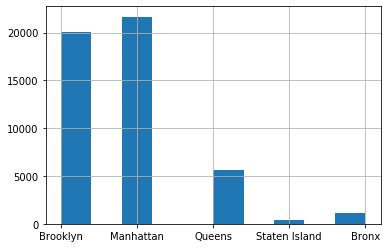

In [13]:
df['neighbourhood_group'].hist()

Brooklyn and Manhattan have significantly more listings than other areas. The Bronx and especially Staten Island have little representation in comparison. Let's see how the price differs across neighbourhoods and room type.

In [32]:
df.groupby(['room_type','neighbourhood_group'])['price'].describe()

count        mean         std   min  \
room_type       neighbourhood_group                                          
Entire home/apt Bronx                  379.0  127.506596   95.027102  28.0   
                Brooklyn              9559.0  178.327545  226.415825   0.0   
                Manhattan            13199.0  249.239109  331.830132   0.0   
                Queens                2096.0  147.050573  129.383208  10.0   
                Staten Island          176.0  173.846591  394.600216  48.0   
Private room    Bronx                  652.0   66.788344  107.009071   0.0   
                Brooklyn             10132.0   76.500099  124.713499   0.0   
                Manhattan             7982.0  116.776622  190.191318  10.0   
                Queens                3372.0   71.762456  180.506756  10.0   
                Staten Island          188.0   62.292553   36.138245  20.0   
Shared room     Bronx                   60.0   59.800000  101.798871  20.0   
                Brooklyn               413.0   50.527845   53.444485   0.0   
                Manhattan              480.0   88.977083   92.416534  10.0   
                Queens                 198.0   69.020202  171.000607  11.0   
                Staten Island            9.0   57.444444   45.119594  13.0   

                                       25%    50%     75%      max  
room_type       neighbourhood_group                                 
Entire home/apt Bronx                 80.0  100.0  140.00   1000.0  
                Brooklyn             105.0  145.0  199.00  10000.0  
                Manhattan            142.5  191.0  259.00  10000.0  
                Queens                90.0  120.0  168.25   2600.0  
                Staten Island         75.0  100.0  151.25   5000.0  
Private room    Bronx                 40.0   53.5   70.00   2500.0  
                Brooklyn              50.0   65.0   80.00   7500.0  
                Manhattan             68.0   90.0  120.00   9999.0  
                Queens                47.0   60.0   75.00  10000.0  
                Staten Island         40.0   50.0   75.00    300.0  
Shared room     Bronx                 28.0   40.0   55.50    800.0  
                Brooklyn              30.0   36.0   50.00    725.0  
                Manhattan             49.0   69.0   89.25   1000.0  
                Queens                30.0   37.0   54.25   1800.0  
                Staten Island         29.0   30.0   75.00    150.0

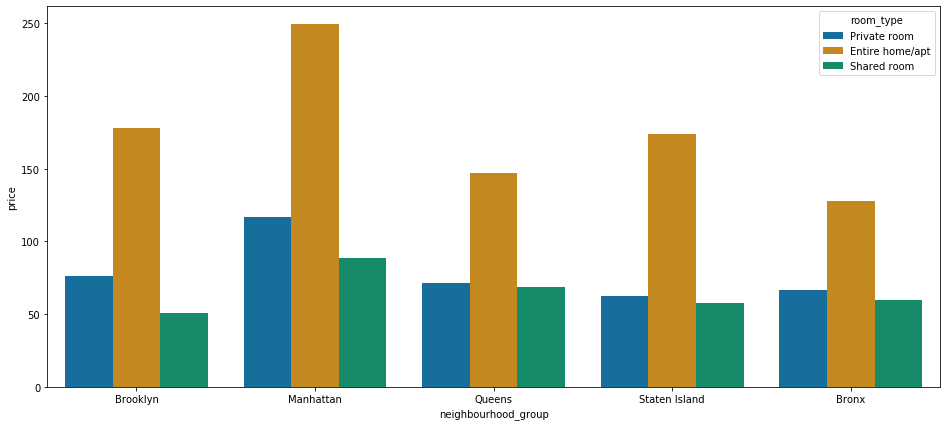

In [31]:
# And plot it to get a better look 
plt.figure(figsize=(16, 7))
sns.barplot(df.neighbourhood_group, df.price, hue=df.room_type, palette="colorblind", ci = None)

Manhattan listings are significantly more expensive than other neighbourhoods. Not so much variation between prices in other neighbourhoods. Of the other 4 areas; it's interesting that shared rooms in Brooklyn are the least expensive while entire properties are the most expensive. It's possible that listings in Brooklyn, Queens and Bronx could get more expensive as they approach the Manhattan border. This could be future work to look into. Also look at availability 365 - bookings with less availability could be a good price so get booked up and vice versa. 

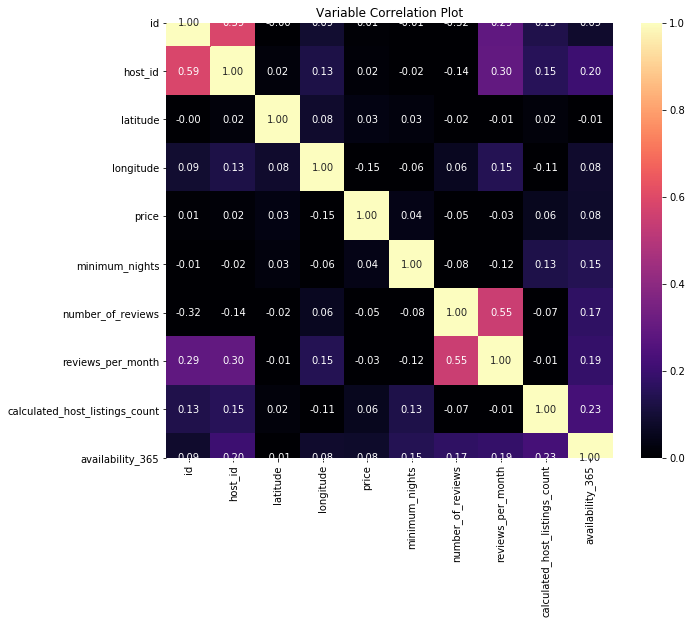

In [53]:
# Top and bottom rows are cut off, this is because 
plt.figure(figsize=(10, 8))
plt.title("Variable Correlation Plot")
sns.heatmap(data = df.corr(), fmt = '.2f', annot=True, cmap='magma', vmin=0, vmax=1)
plt.show()